In [22]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from statsmodels.graphics.tsaplots import plot_acf
import datetime
from datetime import timedelta

In [23]:
df_combined = pd.read_csv('data/2022-2024_Stats.csv')

In [24]:
df_combined.set_index('Date', inplace=True)
display(df_combined)

train_data, test_data = df_combined[0:int(len(df_combined)*0.9)], df_combined[int(len(df_combined)*0.9):]

train_arima = train_data['New Cases']
test_arima = test_data['New Cases']

,Open Balances,Closed,New Cases
Date,,,
2022-01-01,1963,0,468
2022-01-02,2431,0,503
2022-01-03,2934,857,1212
2022-01-04,3146,727,1039
2022-01-05,3368,949,826
...,...,...,...
2024-03-21,2521,429,428
2024-03-22,2499,432,406
2024-03-23,2473,11,211


# ARIMA Model

In [4]:
# Initialize history with training data
history = [x for x in train_arima]
y = test_arima
predictions = list()
residuals = list()  # List to store residuals

# Iterate over test data to make predictions
for i in range(0, len(y)):
    model = ARIMA(history, order=(7,1,1))
    model_fit = model.fit()
    # Forecast the next value
    yhat = model_fit.forecast()[0]
    # Append the forecasted value to predictions
    predictions.append(yhat)
    # Get the observation from test data
    obs = y[i]
    # Calculate residual
    residual = obs - yhat
    residuals.append(residual)
    # Update the history with the observation
    history.append(obs)

C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\janic\Ap

In [5]:
# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

MSE: 7498.282782846763
MAE: 59.736106656425974
RMSE: 86.5926254530186


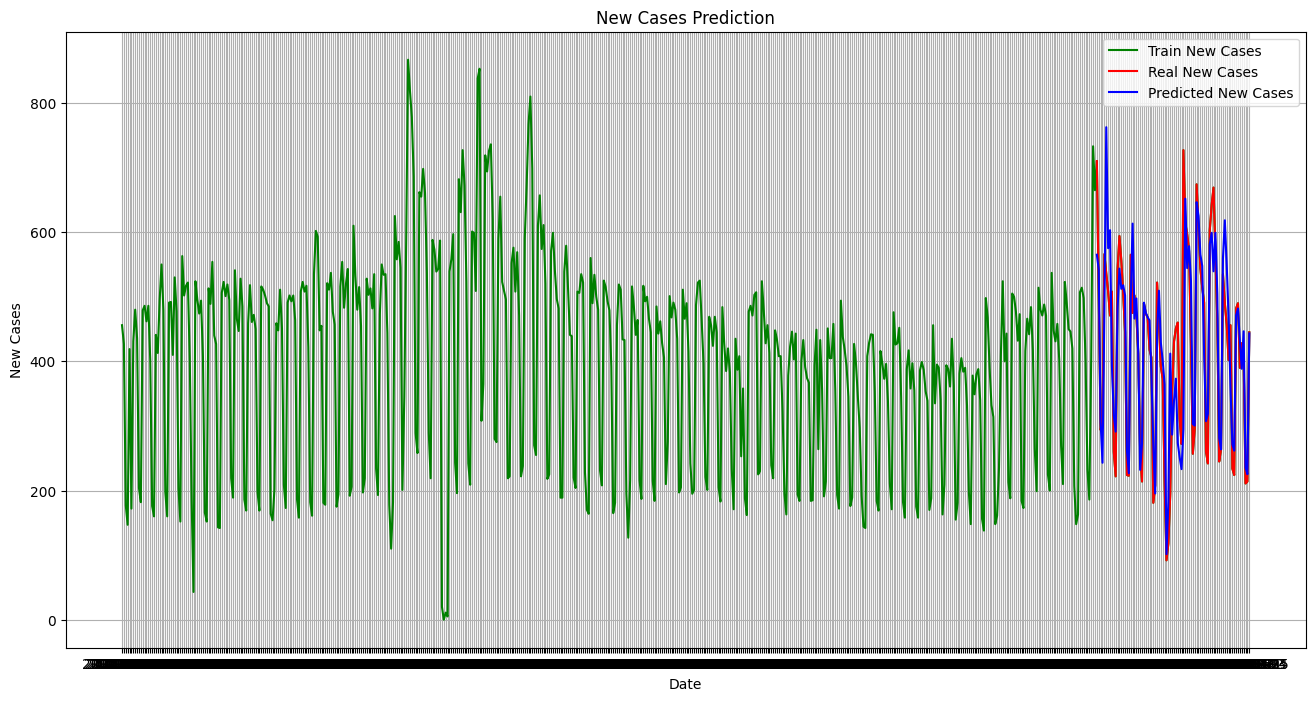

In [6]:
plt.figure(figsize=(16,8))
plt.plot(df_combined.index[-600:], df_combined['New Cases'].tail(600), color='green', label = 'Train New Cases')
plt.plot(test_data.index, y, color = 'red', label = 'Real New Cases')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted New Cases')
plt.title('New Cases Prediction')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.show()

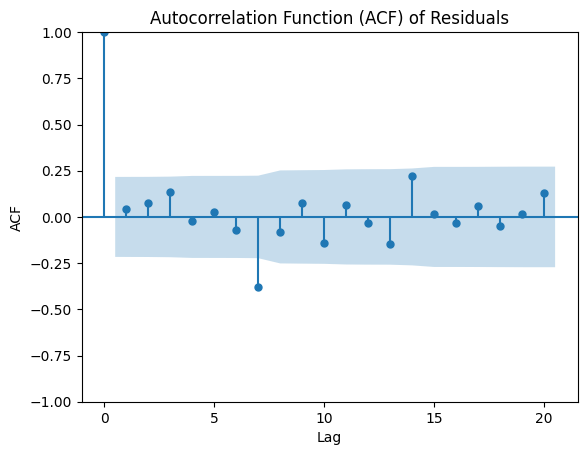

In [7]:
plot_acf(residuals, lags=20)  # Adjust 'lags' as needed
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

## Predicting for 2024, by Week

In [25]:
last_2_months = df_combined[-90:-30]
print(len(last_2_months))

60


In [26]:
# Combine training data from 2022 and 2023
combined_train_data = last_2_months['New Cases'] # Assuming test_arima contains data for 2022 and 2023

# Initialize history with combined training data
history = [x for x in combined_train_data]

predictions_2024 = list()


# Number of time steps to forecast for 2024
num_steps_2024 = 7

# Iterate over the number of time steps to make predictions for 2024
for i in range(num_steps_2024):
    # Fit ARIMA model with seasonal differencing
    model = ARIMA(history, order=(7, 1, 2)) # 7,1,2 is the best combination
    model_fit = model.fit()

    # Forecast the next value
    yhat = model_fit.forecast()[0]
    # Append the forecasted value to predictions
    predictions_2024.append(yhat)

    # Update the history with the forecasted value
    history.append(yhat)

# Now predictions_2024 contains the predicted values for 2024

print(predictions_2024)

C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\janic\AppData\Local\Packages\Pytho

[340.2720779342146, 617.1429391021015, 610.0304490335157, 559.3161153363377, 540.1703232667286, 404.78744028147634, 278.16947880470025]


C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


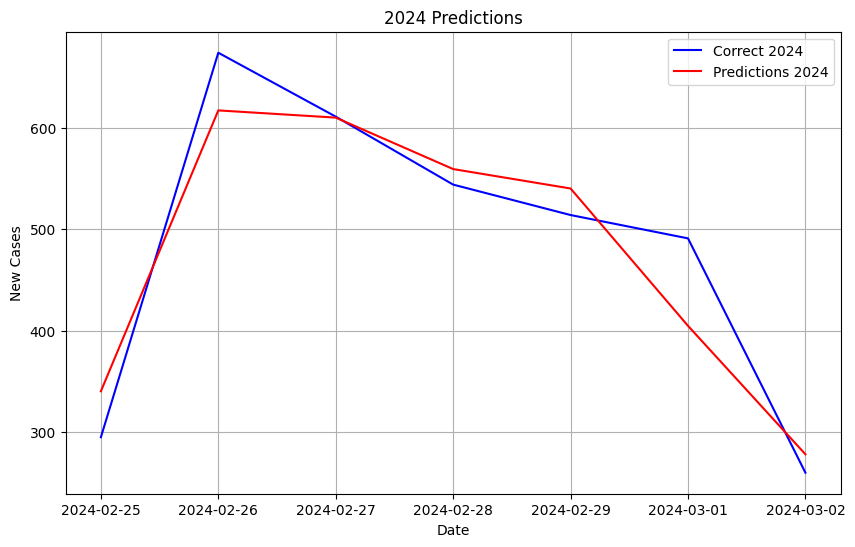

MSE: 1995.061580805869
MAE: 35.56673813212681
RMSE: 44.6661122195101
Measure error compared to the scale of actual values : 7.34633127544667


In [28]:
# Assuming your original data is in a pandas Series or DataFrame format
# and the index is a datetime index
# Create a time index for the 2024 period
start_date_2024 = pd.Timestamp('2024-02-25')
end_date_2024 = start_date_2024 + datetime.timedelta(days=6)
time_index_2024 = pd.date_range(start=start_date_2024, end=end_date_2024, freq='D')

filtered_values = df_combined.loc[str(start_date_2024.date()):str(end_date_2024.date()), 'New Cases']

day2 = pd.Timestamp('2024-02-26')
day6 = pd.Timestamp('2024-03-01')
day2to6 = df_combined.loc[str(day2.date()):str(day6.date()), 'Closed']

# # Plotting
plt.figure(figsize=(10, 6))

plt.plot(time_index_2024, filtered_values, label='Correct 2024', color='blue')

# Plot predicted values for 2024
plt.plot(time_index_2024, predictions_2024, label='Predictions 2024', color='red')

plt.title('2024 Predictions')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.show()

# report performance
mse = mean_squared_error(filtered_values, predictions_2024)
print('MSE: '+str(mse))
mae = mean_absolute_error(filtered_values, predictions_2024)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(filtered_values, predictions_2024))
print('RMSE: '+str(rmse))

mean_actual_values = filtered_values.mean()
error_percentage = (mae / mean_actual_values) * 100
print("Measure error compared to the scale of actual values :", error_percentage)

## Predicting for 2024, by Month

In [29]:
last_100_days = df_combined[-130:-30]
print(len(last_100_days))

100


In [38]:
# Combine training data from 2022 and 2023
combined_train_data = last_100_days['New Cases'] # Assuming test_arima contains data for 2022 and 2023

# Initialize history with combined training data
history = [x for x in combined_train_data]

predictions_2024 = list()


# Number of time steps to forecast for 2024
num_steps_2024 = 30

# Iterate over the number of time steps to make predictions for 2024
for i in range(num_steps_2024):
    # Fit ARIMA model with seasonal differencing
    model = ARIMA(history, order=(12,1,0)) # 12,2, 0 is the best combination
    model_fit = model.fit()

    # Forecast the next value
    yhat = model_fit.forecast()[0]
    # Append the forecasted value to predictions
    predictions_2024.append(yhat)

    # Update the history with the forecasted value
    history.append(yhat)

# Now predictions_2024 contains the predicted values for 2024

print(predictions_2024)

C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\janic\AppData\Local\Packages\Pytho

[232.80641574423998, 503.62549540704816, 518.6501043321401, 452.12765961622983, 465.58277101261433, 389.350172736047, 218.0465544401276, 313.68456043157664, 520.3969949081024, 567.1198876321198, 512.126560092696, 499.7089073953396, 417.76913289944974, 257.86693550627706, 340.09175969006066, 517.6247014107518, 542.3520677687045, 489.16555891745753, 473.22733940057714, 378.7530776252162, 261.56878034819067, 343.67329453706486, 510.64444565931285, 535.4179643381126, 489.9329006914973, 472.8598769818419, 377.56052152552434, 283.8823546581292, 366.1910293714915, 513.007895116166]


C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


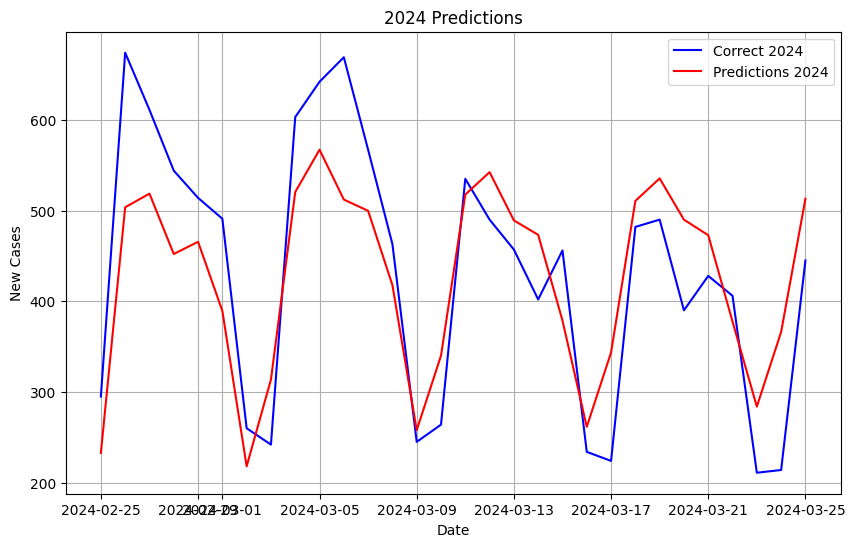

MSE: 6599.95867509257
MAE: 71.14392688796043
RMSE: 81.24012970873797
Measure error compared to the scale of actual values : 16.483764339193797


In [42]:
# Assuming your original data is in a pandas Series or DataFrame format
# and the index is a datetime index
# Create a time index for the 2024 period
start_date_2024 = pd.Timestamp('2024-02-25')
end_date_2024 = start_date_2024 + datetime.timedelta(days=29)
time_index_2024 = pd.date_range(start=start_date_2024, end=end_date_2024, freq='D')

filtered_values = df_combined.loc[str(start_date_2024.date()):str(end_date_2024.date()), 'New Cases']

# # Plotting
plt.figure(figsize=(10, 6))

plt.plot(time_index_2024, filtered_values, label='Correct 2024', color='blue')

# Plot predicted values for 2024
plt.plot(time_index_2024, predictions_2024, label='Predictions 2024', color='red')

plt.title('2024 Predictions')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.show()

# report performance
mse = mean_squared_error(filtered_values, predictions_2024)
print('MSE: '+str(mse))
mae = mean_absolute_error(filtered_values, predictions_2024)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(filtered_values, predictions_2024))
print('RMSE: '+str(rmse))

mean_actual_values = filtered_values.mean()
error_percentage = (mae / mean_actual_values) * 100
print("Measure error compared to the scale of actual values :", error_percentage)

## Dynamic Updating of ARIMA by Week

In [14]:
df_2022_2024_testing = df_combined.copy()
df_2022_2024_testing = df_2022_2024_testing[-90:]

# df_2022_2024_testing.set_index('Date', inplace=False)
df_2022_2024_testing

,Open Balances,Closed,New Cases
Date,,,
2023-12-27,1851,440,514
2023-12-28,1831,447,498
2023-12-29,1780,426,401
2023-12-30,1755,0,232
2023-12-31,1987,0,186
...,...,...,...
2024-03-21,2521,429,428
2024-03-22,2499,432,406
2024-03-23,2473,11,211


In [15]:
open_balance_input = input("Enter today's Open Balance: ")
close_balance_input = input("Enter today's Close Balance: ")
new_balance_input = input("Enter today's New Balance: ")

try:
    open_balance = float(open_balance_input)
    close_balance = float(close_balance_input)
    new_balance = float(new_balance_input)
except ValueError:
    print("Error: Please enter valid numbers for balances.")
else:
    #today_date = datetime.now().strftime('%Y-%m-%d')  # Get today's date in YYYY-MM-DD format
    new_data = {'Open Balances': open_balance,
                'Closed': close_balance,
                'New Cases': new_balance
                }
    df_2022_2024_testing = df_2022_2024_testing.append(new_data, ignore_index=True)
    print("Values successfully added to DataFrame.")
    print(df_2022_2024_testing[-7:])

df_2022_2024_testing

Values successfully added to DataFrame.
    Open Balances  Closed  New Cases
84         2737.0   410.0      390.0
85         2521.0   429.0      428.0
86         2499.0   432.0      406.0
87         2473.0    11.0      211.0
88         2673.0     0.0      214.0
89         2737.0   466.0      445.0
90         2500.0   500.0      350.0


C:\Users\janic\AppData\Local\Temp\ipykernel_33268\3969912537.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2022_2024_testing = df_2022_2024_testing.append(new_data, ignore_index=True)


,Open Balances,Closed,New Cases
0,1851.0,440.0,514.0
1,1831.0,447.0,498.0
2,1780.0,426.0,401.0
3,1755.0,0.0,232.0
4,1987.0,0.0,186.0
...,...,...,...
86,2499.0,432.0,406.0
87,2473.0,11.0,211.0
88,2673.0,0.0,214.0
89,2737.0,466.0,445.0


In [16]:
# # Initialize an empty list to store predictions for 2024
predictions_2024 = []

# Number of time steps to forecast for each update
num_steps_2024 = 7

combined_train_data = df_2022_2024_testing['New Cases']
history = combined_train_data.tolist()

if len(combined_train_data) >= 90:

    history.pop(0)  # Remove the oldest value from history
    combined_train_data.pop(0) # Remove the oldest value from combined_train_data
    df_2022_2024_testing = df_2022_2024_testing.drop(df_2022_2024_testing.index[0])

# Make predictions for the next 7 days
for i in range(num_steps_2024):
    # Fit ARIMA model with seasonal differencing
    model = ARIMA(history, order=(7,1,2)) # 7, 1, 0 is the best combination
    model_fit = model.fit()

    # Forecast the next value
    yhat = model_fit.forecast()[0]
    # Append the forecasted value to predictions
    predictions_2024.append(yhat)

    # Update the history with the forecasted value
    history.append(yhat)


#combined_train_data.pop(0)

# Now predictions_2024 contains the predicted values for 2024
print(len(combined_train_data))
print(predictions_2024)

C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\janic\AppData\Local\Packages\Pytho

90
[309.3182651253965, 374.77131065420264, 349.8185490549438, 200.33671801428477, 234.29481695591656, 404.4590392058848, 347.7364971780116]


C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
print(len(history))
print(history)

97
[498.0, 401.0, 232.0, 186.0, 406.0, 733.0, 665.0, 710.0, 507.0, 294.0, 305.0, 566.0, 536.0, 508.0, 471.0, 508.0, 260.0, 222.0, 541.0, 594.0, 556.0, 504.0, 445.0, 224.0, 223.0, 565.0, 475.0, 502.0, 471.0, 412.0, 260.0, 214.0, 490.0, 474.0, 468.0, 418.0, 406.0, 181.0, 208.0, 522.0, 459.0, 392.0, 373.0, 215.0, 92.0, 118.0, 195.0, 352.0, 431.0, 451.0, 460.0, 311.0, 272.0, 727.0, 614.0, 597.0, 571.0, 430.0, 257.0, 295.0, 674.0, 611.0, 544.0, 514.0, 491.0, 260.0, 242.0, 603.0, 642.0, 669.0, 567.0, 463.0, 245.0, 264.0, 535.0, 490.0, 457.0, 402.0, 456.0, 234.0, 224.0, 482.0, 490.0, 390.0, 428.0, 406.0, 211.0, 214.0, 445.0, 350.0, 309.3182651253965, 374.77131065420264, 349.8185490549438, 200.33671801428477, 234.29481695591656, 404.4590392058848, 347.7364971780116]


In [18]:
# start_date_2024 = pd.Timestamp.today().date()
# print(start_date_2024)
combined_train_data
df_2022_2024_testing

,Open Balances,Closed,New Cases
1,1831.0,447.0,498.0
2,1780.0,426.0,401.0
3,1755.0,0.0,232.0
4,1987.0,0.0,186.0
5,2173.0,3.0,406.0
...,...,...,...
86,2499.0,432.0,406.0
87,2473.0,11.0,211.0
88,2673.0,0.0,214.0
89,2737.0,466.0,445.0


In [19]:
from datetime import timedelta

# turn dataframe back into date index
today_date = pd.to_datetime('2024-03-26')

# 90 days prior
start_historical_date = today_date - timedelta(days=89)
# date range for 90 days
historical_date_range = pd.date_range(start=start_historical_date, end=today_date, freq='D')
print(len(historical_date_range))
# make date the index
df_2022_2024_testing.index = historical_date_range

df_2022_2024_testing

90


,Open Balances,Closed,New Cases
2023-12-28,1831.0,447.0,498.0
2023-12-29,1780.0,426.0,401.0
2023-12-30,1755.0,0.0,232.0
2023-12-31,1987.0,0.0,186.0
2024-01-01,2173.0,3.0,406.0
...,...,...,...
2024-03-22,2499.0,432.0,406.0
2024-03-23,2473.0,11.0,211.0
2024-03-24,2673.0,0.0,214.0
2024-03-25,2737.0,466.0,445.0


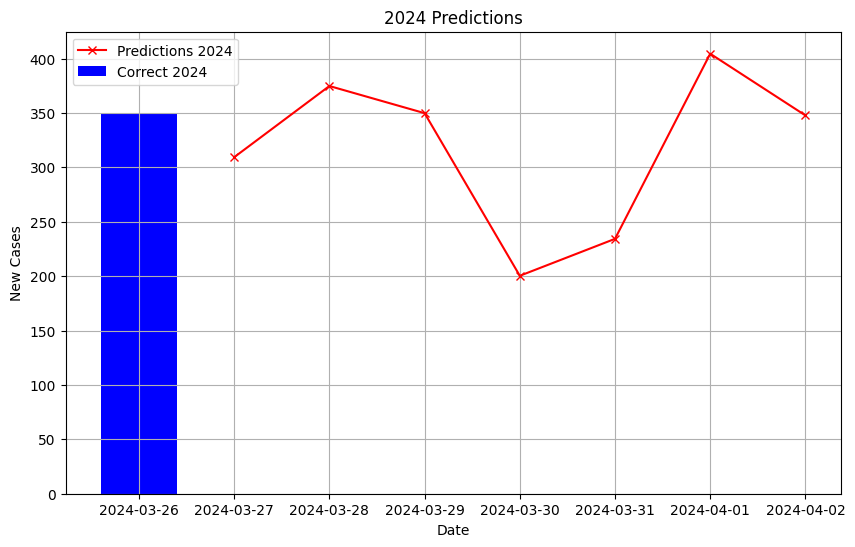

In [20]:
# Sample data for filtered_values
filtered_values = df_2022_2024_testing['New Cases'][-1:]

# Calculate the start and end dates for predictions
pred_start_date = pd.Timestamp('2024-03-27')
pred_end_date = pred_start_date + pd.Timedelta(days=6)
time_index_2024 = pd.date_range(start=pred_start_date, end=pred_end_date, freq='D')

# Plotting
plt.figure(figsize=(10, 6))

# Plot filtered_values as a bar plot
plt.bar(df_2022_2024_testing.index[-1:], filtered_values, label='Correct 2024', color='blue')

# Plot predicted values for 2024 as a line plot
plt.plot(time_index_2024, predictions_2024, marker='x', label='Predictions 2024', color='red')

plt.title('2024 Predictions')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.show()